In [2]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('FrozenLake-v0')

[2017-06-08 22:35:21,931] Making new env: FrozenLake-v0


In [51]:
tf.reset_default_graph()

In [52]:
inputs1 = tf.placeholder(shape=[1,16], dtype=np.float32, name='inputs1')

In [53]:
W = tf.Variable(tf.random_uniform([16,4],0,0.01), dtype=np.float32, name='W')
b = tf.Variable(np.zeros([1,4]), dtype=np.float32, name='b')

In [54]:
Qout = tf.matmul(inputs1, W) + b

In [70]:
predict = tf.argmax(Qout, 1)

In [71]:
nextQ = tf.placeholder(shape=[1,4], dtype=np.float32, name='nextQ')
loss = tf.reduce_sum(tf.square(Qout - nextQ))
trainer = tf.train.GradientDescentOptimizer(learning_rate=.1)
updateModel = trainer.minimize(loss)

In [88]:
init = tf.initialize_all_variables()
y=.95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        j = 0
        rAll = 0
        while j <= 99:
            j += 1
            q = np.zeros([1,16])
            q[0][s] = 1
            a, allQ = sess.run([predict, Qout], {inputs1: q})
            s1, r, done, info = env.step(a[0])
            
            q1 = np.zeros([1,16])
            q1[0][s1] = 1
            Q1 = sess.run(Qout,feed_dict={inputs1:q1})
            maxQ1 = np.max(Q1)
            
            targetQ = allQ
            
            targetQ[0,a[0]] = r + y*maxQ1
            
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:q,nextQ:targetQ})
            
            rAll += r
            s = s1
            if done:
                break
        
        jList.append(j)
        rList.append(rAll)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-06-10 14:52:16,472] From <ipython-input-88-832584c7f923>:1: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


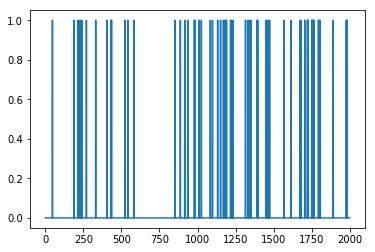

In [87]:
plt.plot(rList)

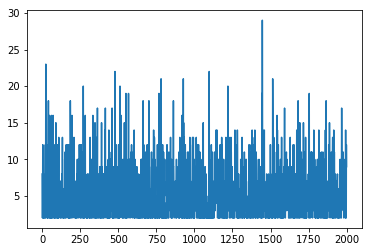

In [90]:
plt.plot(jList)